# Notes

* make histogram of total channels per file, total channels = 550
* make histogram of min/max/avg of all channels
    * not actual min/max, but maybe 2 standard deviations below and above mean
* correlation matrix!! between different channels - at first just for one day
* ARIMA model to predict channel outputs?

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import h5py
import os

import pickle

In [8]:
def hdf_file_to_df(hdf_file_name):
    cwd = os.getcwd()
    f = h5py.File(hdf_file_name, 'r')
    dd_keys = list(f['DYNAMIC DATA'].keys())
    
    matrix = []
    
    for key in dd_keys:
        one_channel = np.array(f['DYNAMIC DATA'][key]['MEASURED'])
        matrix.append(one_channel)
    
    np_matrix = np.array(matrix)
    f.close()
    return pd.DataFrame(np_matrix.T, columns=dd_keys)

In [9]:
def find_file(year, month, day):
    file_list = os.listdir('competitionfiles/')
    return_list = []
    
    for filename in file_list:
        if (filename[8:12] == year and
            filename[12:14] == month and
            filename[14:16] == day):
            return_list.append(filename)
    
    return return_list

In [10]:
with open('channel_dict.pkl', 'rb') as picklefile: 
    channel_dict = pickle.load(picklefile)

In [62]:
with open('channels_per_file_dict.pkl', 'rb') as picklefile: 
    channels_per_file_dict = pickle.load(picklefile)

In [ ]:
#with open('all_channels_list.pkl', 'rb') as picklefile: 
#    all_channels_list = pickle.load(picklefile)

In [65]:
channel_frequency = list(channel_dict.values())

In [66]:
channel_appearances_df = pd.DataFrame(channel_dict, index=['Frequency']).T

In [67]:
min([int(i[3:]) for i in list(channel_appearances_df.index)])
max([int(i[3:]) for i in list(channel_appearances_df.index)])

565

In [68]:
channel_appearances_df.sort_values('Frequency', ascending=False)

,Frequency
ch_1,884
ch_41,884
ch_50,884
ch_49,884
ch_48,884
ch_47,884
ch_46,884
ch_43,884
ch_42,884
ch_40,884


In [69]:
channel_appearances_df['Frequency'].value_counts()

9      123
63      69
884     48
120     34
71      20
100     18
183     18
576     17
732     11
2       11
122     10
882      9
7        8
217      8
653      8
860      7
129      6
181      5
197      5
61       5
226      5
764      4
126      4
14       4
42       3
57       3
13       3
387      3
393      3
121      3
      ... 
163      1
192      1
840      1
819      1
803      1
801      1
792      1
790      1
772      1
762      1
744      1
741      1
740      1
739      1
854      1
681      1
677      1
676      1
675      1
668      1
598      1
593      1
858      1
543      1
396      1
336      1
278      1
219      1
205      1
289      1
Name: Frequency, Length: 88, dtype: int64

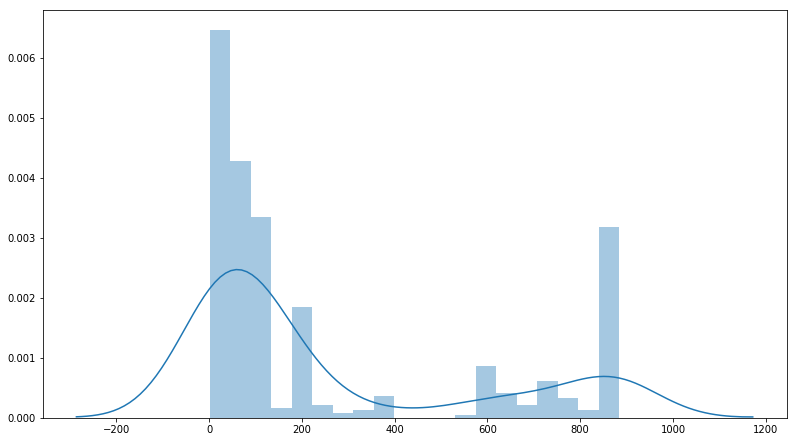

In [22]:
s = 1.2
plt.figure(figsize=(16/s, 9/s))

sns.distplot(channel_frequency, bins=20)

## channels_per_file_dict

In [71]:
list(channels_per_file_dict.values())

[152,
 180,
 152,
 160,
 244,
 238,
 244,
 120,
 152,
 152,
 120,
 160,
 152,
 169,
 120,
 152,
 120,
 209,
 152,
 120,
 209,
 244,
 152,
 152,
 120,
 152,
 120,
 152,
 120,
 188,
 152,
 238,
 120,
 152,
 120,
 120,
 152,
 152,
 120,
 120,
 238,
 120,
 209,
 236,
 120,
 120,
 152,
 152,
 238,
 244,
 152,
 152,
 194,
 120,
 142,
 152,
 120,
 152,
 152,
 152,
 152,
 152,
 120,
 152,
 160,
 175,
 238,
 152,
 152,
 120,
 115,
 209,
 120,
 238,
 232,
 244,
 120,
 236,
 120,
 120,
 120,
 120,
 152,
 188,
 189,
 152,
 120,
 244,
 152,
 152,
 152,
 238,
 152,
 152,
 238,
 160,
 152,
 194,
 120,
 152,
 120,
 152,
 238,
 235,
 152,
 152,
 120,
 152,
 152,
 236,
 152,
 120,
 238,
 120,
 152,
 120,
 120,
 120,
 160,
 120,
 152,
 152,
 120,
 152,
 152,
 244,
 152,
 152,
 152,
 147,
 238,
 120,
 238,
 120,
 152,
 173,
 152,
 152,
 142,
 244,
 152,
 189,
 152,
 241,
 152,
 152,
 152,
 120,
 115,
 120,
 142,
 152,
 232,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 244,
 152,
 238,
 120,
 238,
 238,
 152

In [74]:
channels_per_file_df = pd.DataFrame(channels_per_file_dict, index=['Channels per File']).T
channels_per_file_df

,Channels per File
COOLCAT_20100710_090236_48_20100710_090236_484.hdf,152
COOLCAT_20101212_063501_01_20101212_063501_051.hdf,180
COOLCAT_20100613_233707_51_20100613_233707_516.hdf,152
COOLCAT_20101009_171337_54_20101009_171337_543.hdf,160
COOLCAT_20110219_063826_58_20110219_063826_582.hdf,244
COOLCAT_20110615_072718_93_20110615_072718_930.hdf,238
COOLCAT_20110426_064910_33_20110426_064910_347.hdf,244
COOLCAT_20100609_105544_87_20100609_105544_877.hdf,120
COOLCAT_20100621_075732_43_20100621_075732_464.hdf,152
COOLCAT_20100625_163846_48_20100625_163846_481.hdf,152


In [78]:
channels_per_file_df['Channels per File'].value_counts()

152    315
120    264
238    100
244     40
209     20
160     20
115     15
236     14
180     13
189     10
232      9
142      9
147      8
188      8
194      7
175      7
150      7
173      5
235      4
241      3
218      2
207      2
169      2
Name: Channels per File, dtype: int64

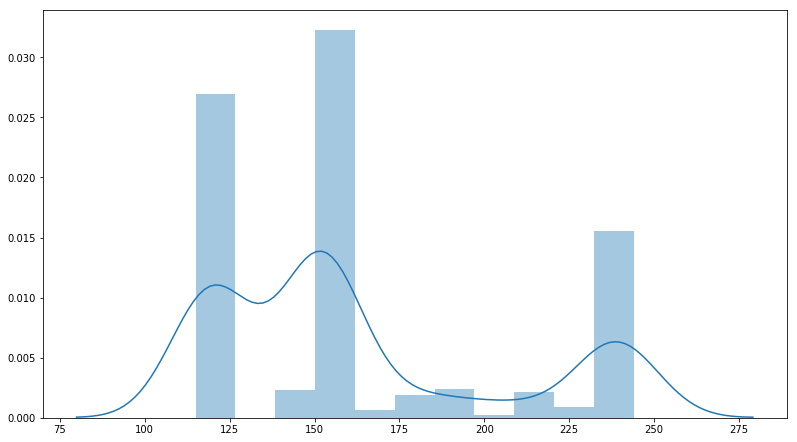

In [81]:
s = 1.2
plt.figure(figsize=(16/s, 9/s))

sns.distplot(list(channels_per_file_df['Channels per File']))